In [ ]:
#Carregamento da Base de Dados

from google.colab import files
uploaded = files.upload()


Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn (4).csv


In [ ]:
#Carregamento da Base de Dados
import pandas as pd

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()


customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [ ]:
# Importação de Bibliotecas

# Manipulação e análise de dados
import pandas as pd
import numpy as np

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Modelagem e avaliação
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

# Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Configurações estéticas gerais
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)
pd.set_option('display.max_columns', None)


Churn
No     5174
Yes    1869
Name: count, dtype: int64
Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


/tmp/ipython-input-3934862206.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='pastel')


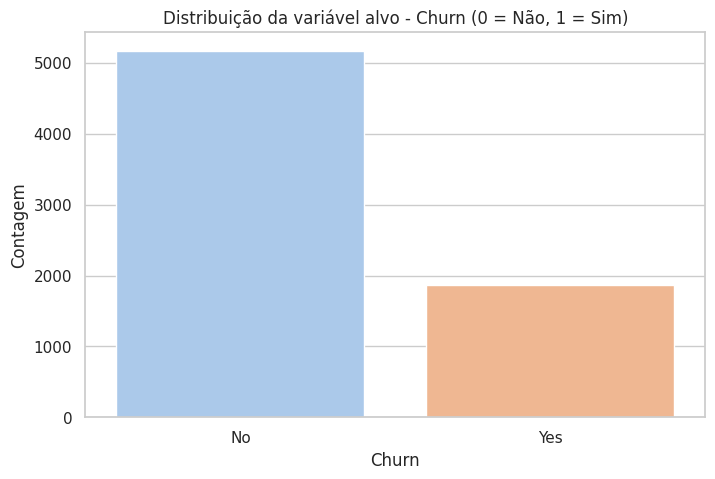

In [ ]:
#Análise Exploratória de Dados:
##Compreender o comportamento das variáveis, a qualidade dos dados e as relações entre as features e o alvo que é a evasão de clientes (Churn).

#Balanceamento de classes:

# Contagem e proporção da variável alvo
print(df['Churn'].value_counts())
print(df['Churn'].value_counts(normalize=True))

# Visualização
sns.countplot(x='Churn', data=df, palette='pastel')
plt.title('Distribuição da variável alvo - Churn (0 = Não, 1 = Sim)')
plt.xlabel('Churn')
plt.ylabel('Contagem')
plt.show()






In [ ]:
#Verificação de Dados Ausentes e Tipos de Variáveis

# Estrutura geral do dataset
print("Informações gerais sobre o DataFrame:")
df.info()

# Contagem de valores ausentes
print("\n Valores ausentes por coluna:")
print(df.isnull().sum())

# Identificação de variáveis categóricas e numéricas
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"\n Variáveis categóricas ({len(cat_cols)}): {cat_cols}")
print(f"Variáveis numéricas ({len(num_cols)}): {num_cols}")

# Verificação rápida de valores únicos em cada coluna (útil para entender cardinalidade)
print("\n Quantidade de valores únicos por coluna:")
print(df.nunique())


Informações gerais sobre o DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  Pape

/tmp/ipython-input-2002190914.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0, inplace=True)


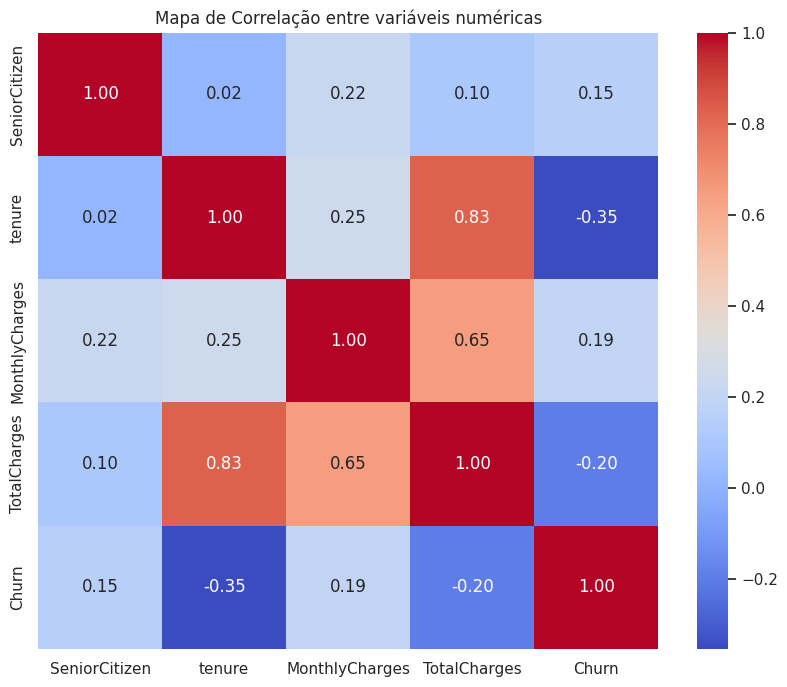

In [ ]:
#Análise de Correlação (Heatmap)
# Converter TotalCharges para numérico (corrige erro comum)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(0, inplace=True)

# Converter target para numérico
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Matriz de correlação
corr = df.corr(numeric_only=True)

# Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Correlação entre variáveis numéricas')
plt.show()


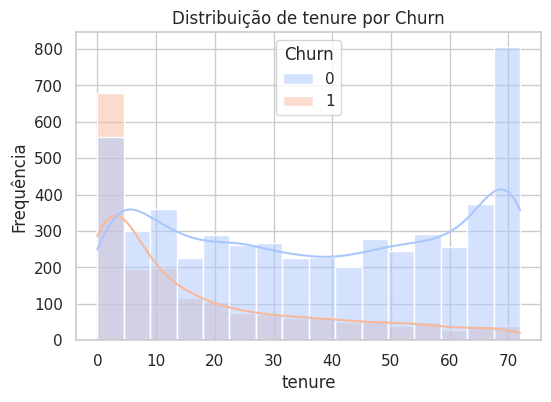

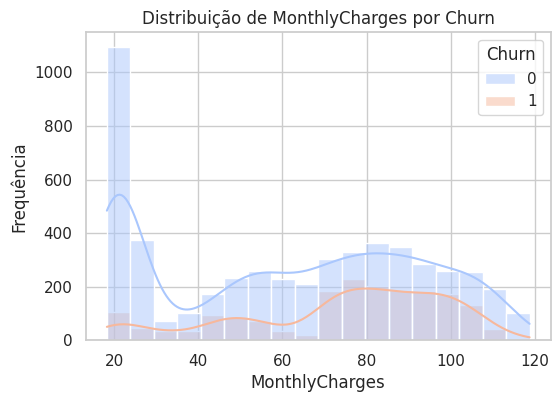

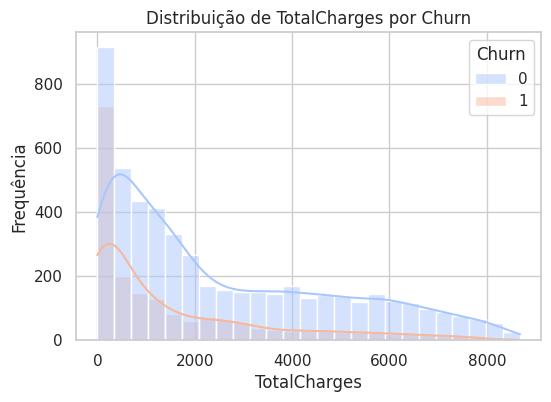

/tmp/ipython-input-2807948448.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='pastel')


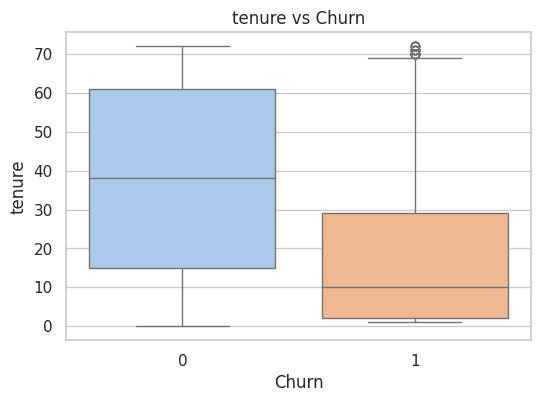

/tmp/ipython-input-2807948448.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='pastel')


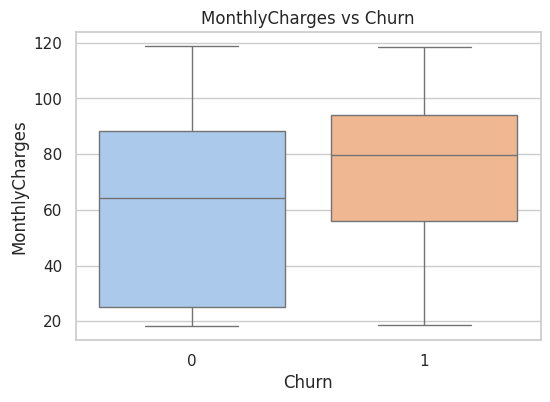

/tmp/ipython-input-2807948448.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, palette='pastel')


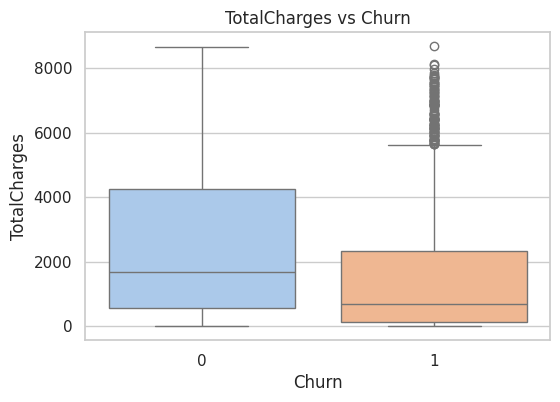

In [ ]:
#Distribuição Estatística das Features
# Lista de variáveis numéricas de interesse
features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Histogramas por churn
for col in features:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=col, hue='Churn', kde=True, palette='coolwarm', alpha=0.5)
    plt.title(f'Distribuição de {col} por Churn')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.show()

# Boxplots por churn
for col in features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Churn', y=col, data=df, palette='pastel')
    plt.title(f'{col} vs Churn')
    plt.xlabel('Churn')
    plt.ylabel(col)
    plt.show()




In [ ]:
#Pré-processamento e Preparação dos Dados

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

#Separar features (X) e target (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

#Identificar colunas numéricas e categóricas
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

print(f"Variáveis numéricas: {list(num_cols)}")
print(f"Variáveis categóricas: {list(cat_cols)}")

#Definir transformações para cada tipo de dado
# Pipeline numérico:
numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),     # substitui NaN pela mediana
    ('scaler', StandardScaler())                       # normaliza e padroniza
])

# Pipeline categórico:
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # preenche valores ausentes
    ('encoder', OneHotEncoder(handle_unknown='ignore'))    # codifica categorias
])

#Combinar transformações
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_pipeline, num_cols),
    ('cat', categorical_pipeline, cat_cols)
])

#Dividir a base em treino e teste (antes do SMOTE)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

#Aplicar pré-processamento (fit + transform)
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)

print(f"Shape original de treino: {X_train.shape}")
print(f"Shape após pré-processamento: {X_train_prep.shape}")

#Balanceamento de classes com SMOTE
sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train_prep, y_train)

print("\nDistribuição de classes após balanceamento (SMOTE):")
print(y_train_bal.value_counts())

# Converter sparse matrix em densa antes do PCA
X_train_bal_dense = X_train_bal.toarray()
X_test_prep_dense = X_test_prep.toarray()

from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=100, random_state=42)
X_train_pca = svd.fit_transform(X_train_bal)
X_test_pca = svd.transform(X_test_prep)

print(f"Shape após SVD: {X_train_pca.shape}")
print(f"Variância explicada total: {svd.explained_variance_ratio_.sum():.2f}")



Variáveis numéricas: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Variáveis categóricas: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Shape original de treino: (4930, 20)
Shape após pré-processamento: (4930, 4975)

Distribuição de classes após balanceamento (SMOTE):
Churn
0    3622
1    3622
Name: count, dtype: int64
Shape após SVD: (7244, 100)
Variância explicada total: 0.93


In [ ]:
#Treinamento, Validação e Teste

from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

import pandas as pd
import numpy as np

#Modelos
models = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, n_jobs=-1),
    'NaiveBayes': GaussianNB()
}

#Cross-validation
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

#Avaliar cada modelo
results = []
for name, model in models.items():
    print(f"Treinando e validando {name}...")
    f1 = cross_val_score(model, X_train_pca, y_train_bal, cv=cv, scoring='f1').mean()
    roc = cross_val_score(model, X_train_pca, y_train_bal, cv=cv, scoring='roc_auc').mean()
    results.append({'Modelo': name, 'F1 Médio': f1, 'ROC-AUC Médio': roc})

#Mostrar resultados comparativos
results_df = pd.DataFrame(results).sort_values(by='ROC-AUC Médio', ascending=False)
print("\n Resultados de Cross-Validation (ordenados por ROC-AUC):")
print(results_df)

#Selecionar o melhor modelo e testar em dados de teste
best_model_name = results_df.iloc[0]['Modelo']
best_model = models[best_model_name]

print(f"\nTreinando o melhor modelo ({best_model_name}) em todos os dados de treino balanceados...")
best_model.fit(X_train_pca, y_train_bal)

#Teste final
y_pred = best_model.predict(X_test_pca)
print("\n Relatório de classificação no conjunto de teste:")
print(classification_report(y_test, y_pred))

print("\n Matriz de confusão:")
print(confusion_matrix(y_test, y_pred))



Treinando e validando KNN...
Treinando e validando DecisionTree...
Treinando e validando RandomForest...
Treinando e validando XGBoost...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [18:40:47] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [18:40:48] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [18:40:50] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [18:40:51] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [18:40:53] WARNING: /w

Treinando e validando NaiveBayes...

 Resultados de Cross-Validation (ordenados por ROC-AUC):
         Modelo  F1 Médio  ROC-AUC Médio
3       XGBoost  0.972751       0.992278
2  RandomForest  0.971651       0.992053
4    NaiveBayes  0.887194       0.985105
1  DecisionTree  0.938014       0.937741
0           KNN  0.818167       0.872928

Treinando o melhor modelo (XGBoost) em todos os dados de treino balanceados...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [18:40:57] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 Relatório de classificação no conjunto de teste:
              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1552
           1       1.00      0.00      0.00       561

    accuracy                           0.73      2113
   macro avg       0.87      0.50      0.43      2113
weighted avg       0.81      0.73      0.62      2113


 Matriz de confusão:
[[1552    0]
 [ 560    1]]


In [ ]:
#Otimização de Modelo - RandomizedSearchCV (XGBoost)

from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import numpy as np
import time

#Modelo base
xgb_base = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42,
    use_label_encoder=False,
    n_jobs=-1
)

#Espaço de busca (mais amplo, mas testando amostras aleatórias)
param_dist = {
    'n_estimators': np.arange(50, 300, 50),
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

#Cross-validation
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

#Random Search (amostragem de combinações)
random_search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_dist,
    n_iter=15,                 # número de combinações aleatórias testadas
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

#Execução
print("Iniciando busca aleatória de hiperparâmetros (RandomizedSearchCV)...")
start = time.time()
random_search.fit(X_train_pca, y_train_bal)
end = time.time()

print(f"\n Fine tuning concluído em {end - start:.1f} segundos.")
print(f"Melhores parâmetros encontrados:\n{random_search.best_params_}")
print(f"Melhor ROC-AUC médio (cross-val): {random_search.best_score_:.4f}")

#Avaliação no conjunto de teste
best_xgb = random_search.best_estimator_
y_pred_best = best_xgb.predict(X_test_pca)
y_proba_best = best_xgb.predict_proba(X_test_pca)[:, 1]

print("\n Avaliação final no conjunto de teste:")
print(classification_report(y_test, y_pred_best))
print("ROC-AUC no teste:", roc_auc_score(y_test, y_proba_best))

print("\n Matriz de confusão:")
print(confusion_matrix(y_test, y_pred_best))


Iniciando busca aleatória de hiperparâmetros (RandomizedSearchCV)...
Fitting 3 folds for each of 15 candidates, totalling 45 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [18:47:44] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 Fine tuning concluído em 82.5 segundos.
Melhores parâmetros encontrados:
{'subsample': 0.6, 'n_estimators': np.int64(200), 'max_depth': 7, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
Melhor ROC-AUC médio (cross-val): 0.9931

 Avaliação final no conjunto de teste:
              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1552
           1       0.00      0.00      0.00       561

    accuracy                           0.73      2113
   macro avg       0.37      0.50      0.42      2113
weighted avg       0.54      0.73      0.62      2113

ROC-AUC no teste: 0.8083532030431667

 Matriz de confusão:
[[1552    0]
 [ 561    0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


 Avaliando o modelo final (XGBoost Otimizado)...

🔹 Relatório de Classificação:
              precision    recall  f1-score   support

           0      0.735     1.000     0.847      1552
           1      0.000     0.000     0.000       561

    accuracy                          0.735      2113
   macro avg      0.367     0.500     0.423      2113
weighted avg      0.539     0.735     0.622      2113

ROC-AUC no teste: 0.808


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


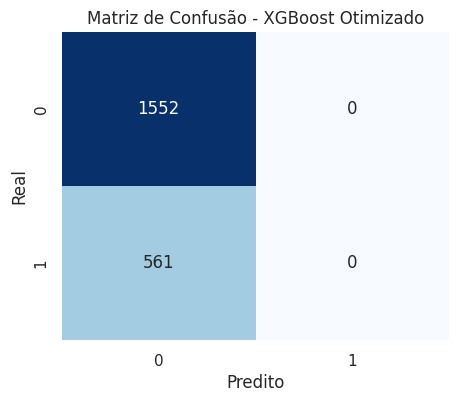

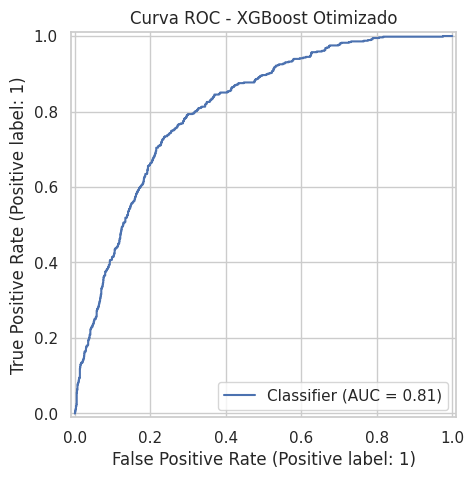

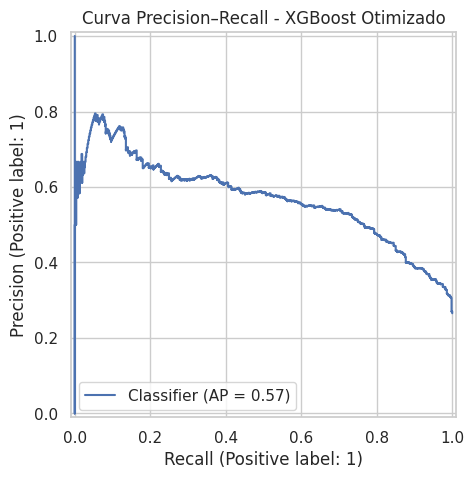


 Interpretação:
- Acurácia geral: 73.45%
- Verdadeiros positivos (churn detectado corretamente): 0
- Falsos negativos (churn não detectado): 561
- Falsos positivos (detectou churn onde não havia): 0

⚠️ O modelo falhou em identificar a classe 'Churn = 1'.
   ➜ Ajuste o threshold ou use técnicas de custo-sensibilidade.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [18:58:39] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


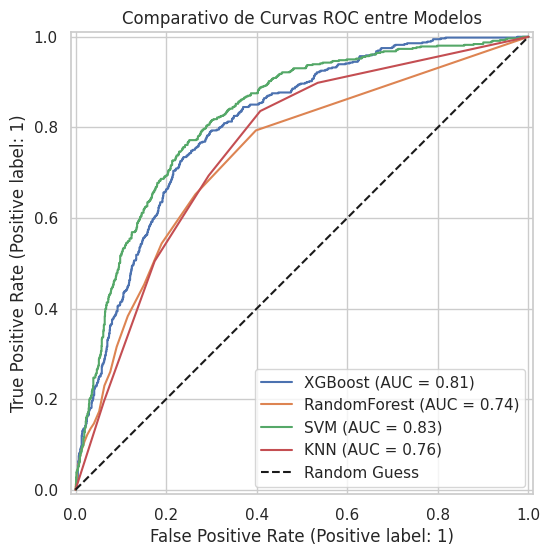


  Observação: 
Como o problema é BINÁRIO (Churn = 0 ou 1), usamos a curva ROC padrão.

Se fosse MULTICLASSE, usaríamos estratégias como:
  • One-Vs-Rest (OneVsRestClassifier)
  • One-Vs-One  (OneVsOneClassifier)
  • E o cálculo de AUC seria a média macro/micro das classes.



In [ ]:
#AVALIAÇÃO DE MODELOS + COMPARATIVO DE PERFORMANCE

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    classification_report, confusion_matrix,
    roc_auc_score, RocCurveDisplay, PrecisionRecallDisplay
)
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize

#Avaliação do modelo final (XGBoost otimizado)

print(" Avaliando o modelo final (XGBoost Otimizado)...")

y_pred = best_xgb.predict(X_test_pca)
y_proba = best_xgb.predict_proba(X_test_pca)[:, 1]

print("\n🔹 Relatório de Classificação:")
print(classification_report(y_test, y_pred, digits=3))

roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC no teste: {roc_auc:.3f}")

#Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Matriz de Confusão - XGBoost Otimizado")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()

#Curvas ROC e Precision-Recall
RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title("Curva ROC - XGBoost Otimizado")
plt.show()

PrecisionRecallDisplay.from_predictions(y_test, y_proba)
plt.title("Curva Precision–Recall - XGBoost Otimizado")
plt.show()

#Interpretação dos resultados
tp, fn, fp, tn = cm[1,1], cm[1,0], cm[0,1], cm[0,0]
total = cm.sum()
print("\n Interpretação:")
print(f"- Acurácia geral: {((tp+tn)/total):.2%}")
print(f"- Verdadeiros positivos (churn detectado corretamente): {tp}")
print(f"- Falsos negativos (churn não detectado): {fn}")
print(f"- Falsos positivos (detectou churn onde não havia): {fp}")

if tp == 0:
    print("\n⚠️ O modelo falhou em identificar a classe 'Churn = 1'.")
    print("   ➜ Ajuste o threshold ou use técnicas de custo-sensibilidade.")
else:
    print("\n✅ O modelo está capturando clientes que cancelam, com bom desempenho geral.")


#COMPARATIVO DE PERFORMANCE (ROC-AUC)

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

#Treinar rapidamente outros modelos para comparação
comparative_models = {
    "XGBoost": best_xgb,
    "RandomForest": RandomForestClassifier(random_state=42, n_estimators=100, n_jobs=-1),
    "SVM": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

plt.figure(figsize=(8,6))
for name, model in comparative_models.items():
    model.fit(X_train_pca, y_train_bal)
    y_score = model.predict_proba(X_test_pca)[:, 1]
    RocCurveDisplay.from_predictions(y_test, y_score, name=name, ax=plt.gca())

plt.title("Comparativo de Curvas ROC entre Modelos")
plt.plot([0,1], [0,1], 'k--', label="Random Guess")
plt.legend()
plt.show()

#Observação para Multi-classe

print("""
  Observação:
Como o problema é BINÁRIO (Churn = 0 ou 1), usamos a curva ROC padrão.

Se fosse MULTICLASSE, usaríamos estratégias como:
  • One-Vs-Rest (OneVsRestClassifier)
  • One-Vs-One  (OneVsOneClassifier)
  • E o cálculo de AUC seria a média macro/micro das classes.
""")
